## Idea

There are more non-subscriber citibike users ('customers') over the weekend compared with during the week. i.e. non-subscribers make up a larger percentage of all citibike users on the weekend (Saturday and Sunday) versus during the week.

# null hypothesis : 

The proportion of Citibike "Customers"(non-subcribed riders) to total riders is the same or lower on weekend days as it is during weekdays. 

_$H_0$ : { # of 'customers' (weekend) / # of total riders (weekend)} <= {# of 'customers' (weekdays) / # of total riders (weekdays)}

_$H_1$ : { # of 'customers' (weekend) / # of total riders (weekend)} > {# of 'customers' (weekdays) / # of total riders (weekdays)}

In [88]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json


Populating the interactive namespace from numpy and matplotlib


In [89]:
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /Users/katharinevoorhees/PUIdata


In [93]:
#NEED TO SET THIS UP IN A REPRODUCABLE WAY 

In [100]:
!curl https://s3.amazonaws.com/tripdata/201808-citibike-tripdata.csv.zip > 201808-citibike-tripdata.csv.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.4M  100 80.4M    0     0  13.4M      0  0:00:05  0:00:05 --:--:-- 16.4M


In [101]:
!mv 201808-citibike-tripdata.csv.zip $PUIDATA
!ls $PUIDATA    

201808-citibike-tripdata.csv     JC-201808-citibike-tripdata.csv
201808-citibike-tripdata.csv.zip


In [129]:
#datastring = '201808'
df = pd.read_csv(os.getenv("PUIDATA")+'/201808-citibike-tripdata.csv.zip')
df['date'] = pd.to_datetime(df['starttime'])

In [131]:
df.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291
5,2839,2018-08-01 00:01:02.7170,2018-08-01 00:48:22.0820,468.0,Broadway & W 56 St,40.765265,-73.981923,3495.0,E 114 St & 1 Ave,40.794566,-73.936254,32418,Customer,1969,0,2018-08-01 00:01:02.717
6,172,2018-08-01 00:01:03.5340,2018-08-01 00:03:55.8740,515.0,W 43 St & 10 Ave,40.760094,-73.994618,529.0,W 42 St & 8 Ave,40.757570,-73.990985,31108,Subscriber,1975,1,2018-08-01 00:01:03.534


In [133]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [134]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [135]:
df.head()

,usertype,date
0,Subscriber,2018-08-01 00:00:07.321
1,Subscriber,2018-08-01 00:00:19.748
2,Subscriber,2018-08-01 00:00:21.175
3,Subscriber,2018-08-01 00:00:26.470
4,Subscriber,2018-08-01 00:00:30.291


In [139]:
df = df.dropna()
df.usertype

0          Subscriber
1          Subscriber
2          Subscriber
3          Subscriber
4          Subscriber
5            Customer
6          Subscriber
7          Subscriber
8          Subscriber
9          Subscriber
10           Customer
11         Subscriber
12         Subscriber
13         Subscriber
14         Subscriber
15         Subscriber
16         Subscriber
17         Subscriber
18           Customer
19         Subscriber
20           Customer
21         Subscriber
22         Subscriber
23         Subscriber
24         Subscriber
25         Subscriber
26         Subscriber
27         Subscriber
28         Subscriber
29         Subscriber
              ...    
1977147    Subscriber
1977148    Subscriber
1977149    Subscriber
1977150    Subscriber
1977151    Subscriber
1977152    Subscriber
1977153    Subscriber
1977154    Subscriber
1977155      Customer
1977156      Customer
1977157    Subscriber
1977158    Subscriber
1977159    Subscriber
1977160    Subscriber
1977161   

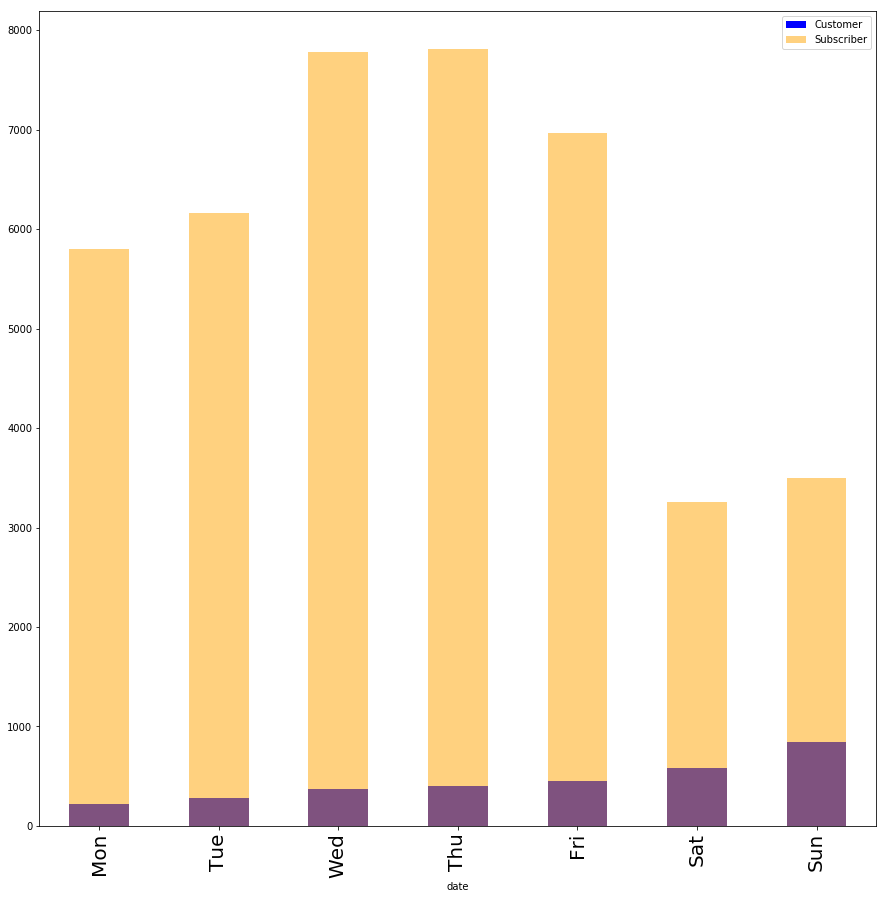

In [52]:
fig = pl.figure(figsize(15,15))

norm_w = 1
((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='Blue', 
                                                                                         label='Customer')

norm_m = 1
ax = ((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='Orange', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

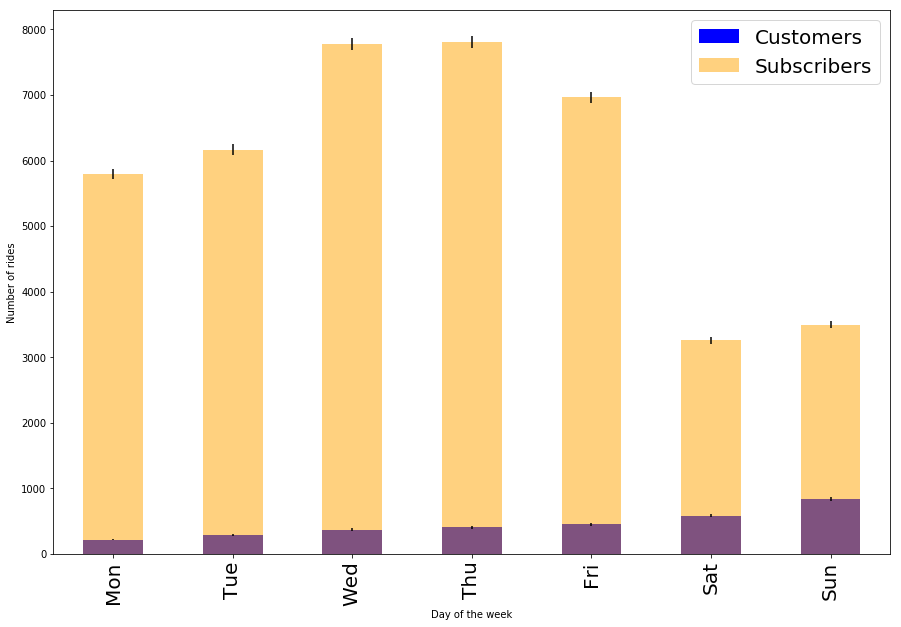

In [57]:
fig=pl.figure(figsize(15,10))

counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='Blue',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Non-Subscribers/Customers')


counts_s = df.date[df.usertype=='Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='Orange', label='Subscribers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Customers','Subscribers'],fontsize=20)

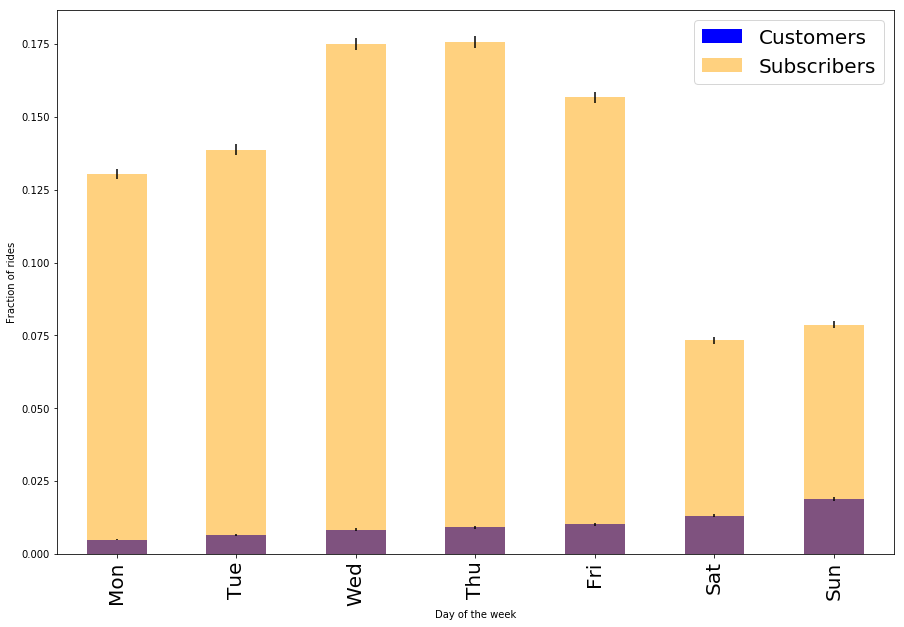

In [60]:
fig = pl.figure(figsize(15,10))

total = counts_c.sum() + counts_s.sum()
error_c = np.sqrt(counts_c)
((counts_c) / total).plot(kind="bar", color='Blue',  
                           yerr=[((error_c) / total, (error_c) / total)], 
                           label='Non-Subscribers/Customers')

norm_s = counts_s.sum()
ax = ((counts_s) / total).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / total, (error_s) / total)], 
                                color = 'Orange', label='Subscribers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Customers','Subscribers'],fontsize=20)


In [ ]:
#add graph of weekday proportion vs weekend proportion